In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
data = pd.read_csv('zeroopenpowerlifting.csv')

In [129]:
data

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.80,60,80.0,...,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.50,60,100.0,...,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.40,56,0.0,...,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.00,60,0.0,...,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.00,110,120.0,...,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767667,Devin Major,M,SBD,Wraps,24.5,24-34,int,73.03,75,0.0,...,540.0,1,392.12,392.12,379.31,579.67,Yes,USA,NASA,2019-10-19
767668,Alfredo Tatum,M,BD,Raw,21.5,20-23,jr,84.10,90,0.0,...,421.0,1,278.86,281.65,268.08,NaN,Yes,USA,NASA,2019-10-19
767669,Ben Sherwood,M,BD,Raw,30.0,24-34,sm1,82.19,82.5,0.0,...,402.5,1,270.25,270.25,260.08,NaN,Yes,USA,NASA,2019-10-19
767670,Coby Carden,M,BD,Raw,62.5,60-64,m3,93.03,100,0.0,...,400.0,1,251.24,349.97,240.46,NaN,Yes,USA,NASA,2019-10-19


In [130]:
int1 = data['Squat3Kg'].value_counts()[0]
int2 = data.count()['Squat3Kg']
int3 = (int1/int2)*100
int3
#Squat 3 Fail rate = 76.9%

76.93976073114558

In [131]:
int1 = data['Bench3Kg'].value_counts()[0]
int2 = data.count()['Bench3Kg']
int3 = (int1/int2)*100
int3
#Bench 3 Fail Rate = 74.6%

74.95531945935244

In [132]:
int1 = data['Deadlift3Kg'].value_counts()[0]
int2 = data.count()['Deadlift3Kg']
int3 = (int1/int2)*100
int3
#Deadlift 3 Fail Rate = 76.9%

76.92386852718349

In [134]:
conditions = [
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 43),
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 47),
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 52),
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 57),
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 63),
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 72),
    (data['Sex'] == 'F') & (data['BodyweightKg'] < 84),
    (data['Sex'] == 'F'),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 53),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 59),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 66),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 74),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 83),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 93),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 105),
    (data['Sex'] == 'M') & (data['BodyweightKg'] < 120),
    (data['Sex'] == 'M')]
choices = ['43','47','52','57','63','72','84','84+',
          '53','59','66','74','83','93','105','120','120+']
data['WeightClassKg'] = np.select(conditions, choices, default='120+')

In [135]:
Squatfail_M = []
Squatfail_F = []

In [136]:
#generate squat male failrates
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+')].count()['Name']
int3 = (int1/int2)*100
Squatfail_M.append(int3)

#generate squat female failrates
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47')].count()['Name']
int3 = (int1/int2)*100
Squatfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52')].count()['Name']
int3 = (int1/int2)*100
Squatfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57')].count()['Name']
int3 = (int1/int2)*100
Squatfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63')].count()['Name']
int3 = (int1/int2)*100
Squatfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72')].count()['Name']
int3 = (int1/int2)*100
Squatfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84')].count()['Name']
int3 = (int1/int2)*100
Squatfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+') & (data['Squat3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+')].count()['Name']
int3 = (int1/int2)*100
Squatfail_F.append(int3)

In [137]:
Squatfail_M

[21.22855292975073,
 24.006195147134747,
 23.095119735330922,
 21.816557094529905,
 23.21856593396384,
 21.411755878408165,
 18.56653649744668,
 17.45924553192826]

In [138]:
Squatfail_F

[25.418340026773762,
 25.126751349288558,
 26.643881417638752,
 28.443522255698937,
 28.69407549807759,
 28.90828764571246,
 31.694317243450193]

In [139]:
Benchfail_M = []
Benchfail_F = []

In [140]:
#generate Bench male failrates
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+')].count()['Name']
int3 = (int1/int2)*100
Benchfail_M.append(int3)

#generate Bench female failrates
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47')].count()['Name']
int3 = (int1/int2)*100
Benchfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52')].count()['Name']
int3 = (int1/int2)*100
Benchfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57')].count()['Name']
int3 = (int1/int2)*100
Benchfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63')].count()['Name']
int3 = (int1/int2)*100
Benchfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72')].count()['Name']
int3 = (int1/int2)*100
Benchfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84')].count()['Name']
int3 = (int1/int2)*100
Benchfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+')].count()['Name']
int3 = (int1/int2)*100
Benchfail_F.append(int3)

In [141]:
Benchfail_M

[28.820006474587245,
 27.909932091656408,
 26.597185319779896,
 24.641421003200538,
 25.310763856630558,
 24.608184282351175,
 23.103634725142687,
 21.616358325219085]

In [142]:
Benchfail_F

[28.246318607764394,
 26.042632066728455,
 25.599970280109964,
 25.94792791768518,
 25.585459629500175,
 25.79177090541332,
 28.481345244351026]

In [143]:
Deadliftfail_M = []
Deadliftfail_F = []

In [144]:
#generate Deadlift male failrates
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '59')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '66')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74') & (data['Bench3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '74')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '83')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '93')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '105')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)
int1 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'M') & (data['WeightClassKg'] == '120+')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_M.append(int3)

#generate Deadlift female failrates
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '47')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '52')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '57')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '63')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '72')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_F.append(int3)
int1 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+') & (data['Deadlift3Kg'])].count()[0]
int2 = data[(data['Sex'] == 'F') & (data['WeightClassKg'] == '84+')].count()['Name']
int3 = (int1/int2)*100
Deadliftfail_F.append(int3)

In [145]:
Deadliftfail_M

[19.860796374231143,
 22.735395734879475,
 26.597185319779896,
 21.430851015327942,
 22.30067448298928,
 20.32001800804735,
 17.30369480324422,
 15.20243741558564]

In [146]:
Deadliftfail_F

[26.77376171352075,
 27.96707190753966,
 29.961364142952675,
 32.67580012506395,
 32.2942153093324,
 31.114600521637303,
 32.98926507018993]

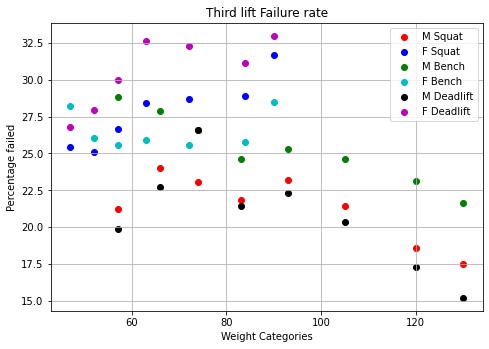

In [155]:
male_cats = [57,66,74,83,93,105,120,130]
female_cats = [47,52,57,63,72,84,90]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(male_cats, Squatfail_M, color = 'r', label='M Squat')
ax.scatter(female_cats, Squatfail_F, color = 'b', label='F Squat')
ax.scatter(male_cats, Benchfail_M, color = 'g', label='M Bench')
ax.scatter(female_cats, Benchfail_F, color = 'c', label='F Bench')
ax.scatter(male_cats, Deadliftfail_M, color = 'k', label='M Deadlift')
ax.scatter(female_cats, Deadliftfail_F, color = 'm', label='F Deadlift')
ax.legend()
ax.grid(True)
ax.set_ylabel('Percentage failed')
ax.set_xlabel('Weight Categories')
ax.set_title('Third lift Failure rate')
plt.show()

In [ ]:
#This doesn't seem to match the overal percentages failed.
#Is anyone able to spot an issue with the way I've structured the code?